In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [2]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("caliper_output/cache_miss/bitonic_sort/*.cali"))
print(tk.tree(metric_column='Avg time/rank'))

(2/2) Creating Thicket: 100%|██████████| 11/11 [00:00<00:00, 549.87it/s]


  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.003 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
3.812 main
├─ 1.447 comm
│  └─ 1.446 comm_large
│     ├─ 1.198 MPI_Recv
│     └─ 0.174 MPI_Send
├─ 2.244 comp
│  └─ 2.243 comp_large
├─ 0.042 correctness_check
│  ├─ 0.000 MPI_Recv
│  └─ 0.000 MPI_Send
└─ 0.068 data_init_runtime
   └─ 0.068 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 3.81 indices: {'profile': 121913068})
█ 3.43 - 3.81
█ 2.67 - 3.43
█ 1.91 - 2.67
█ 1.14 - 1.91
█ 0.38 - 1.14
█ 0.00 - 0.38

name User code    ◀  Only in left graph    ▶  Only in right graph



View Calltree

In [3]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")
tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()
tk.show_metric_columns()

df = tk.dataframe.reset_index()
df

,node,num_procs,input_size,input_type,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Min L1 misses/rank (exc),Max L1 misses/rank (exc),Avg L1 misses/rank (exc),Total L1 misses (exc),Min L2 misses/rank (exc),Max L2 misses/rank (exc),Avg L2 misses/rank (exc),Total L2 misses (exc),Min L1 misses/rank,Max L1 misses/rank,Avg L1 misses/rank,Total L1 misses,Min L2 misses/rank,Max L2 misses/rank,Avg L2 misses/rank,Total L2 misses,Variance time/rank,Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),name
0,"{'name': 'MPI_Comm_dup', 'type': 'function'}",16,268435456,Random,1233703652,19.0,regionprofile,0.000851,0.004443,0.002317,0.037079,3443.0,4992.0,4.620312e+03,7.392500e+04,1755.0,2.001000e+03,1.869875e+03,2.991800e+04,3443.0,4992.0,4.620312e+03,7.392500e+04,1755.0,2.001000e+03,1.869875e+03,2.991800e+04,0.000001,1.0,1.0,1.0,16.0,0.000851,0.004443,0.002317,0.037079,MPI_Comm_dup
1,"{'name': 'MPI_Comm_dup', 'type': 'function'}",16,268435456,ReverseSorted,121913068,19.0,regionprofile,0.001043,0.005429,0.003494,0.055906,3672.0,5783.0,4.652125e+03,7.443400e+04,1717.0,2.009000e+03,1.841625e+03,2.946600e+04,3672.0,5783.0,4.652125e+03,7.443400e+04,1717.0,2.009000e+03,1.841625e+03,2.946600e+04,0.000002,1.0,1.0,1.0,16.0,0.001043,0.005429,0.003494,0.055906,MPI_Comm_dup
2,"{'name': 'MPI_Comm_dup', 'type': 'function'}",16,268435456,Sorted,1016575829,19.0,regionprofile,0.000992,0.006340,0.002935,0.046957,3156.0,6207.0,4.695750e+03,7.513200e+04,1775.0,2.087000e+03,1.876562e+03,3.002500e+04,3156.0,6207.0,4.695750e+03,7.513200e+04,1775.0,2.087000e+03,1.876562e+03,3.002500e+04,0.000003,1.0,1.0,1.0,16.0,0.000992,0.006340,0.002935,0.046957,MPI_Comm_dup
3,"{'name': 'MPI_Comm_dup', 'type': 'function'}",16,536870912,Random,2214393963,19.0,regionprofile,0.000663,0.035972,0.021984,0.351749,3486.0,5060.0,4.662250e+03,7.459600e+04,1721.0,1.903000e+03,1.839250e+03,2.942800e+04,3486.0,5060.0,4.662250e+03,7.459600e+04,1721.0,1.903000e+03,1.839250e+03,2.942800e+04,0.000187,1.0,1.0,1.0,16.0,0.000663,0.035972,0.021984,0.351749,MPI_Comm_dup
4,"{'name': 'MPI_Comm_dup', 'type': 'function'}",16,536870912,ReverseSorted,2048025550,19.0,regionprofile,0.001288,0.007343,0.004721,0.075542,3540.0,5648.0,4.916625e+03,7.866600e+04,1757.0,2.094000e+03,1.932625e+03,3.092200e+04,3540.0,5648.0,4.916625e+03,7.866600e+04,1757.0,2.094000e+03,1.932625e+03,3.092200e+04,0.000004,1.0,1.0,1.0,16.0,0.001288,0.007343,0.004721,0.075542,MPI_Comm_dup
5,"{'name': 'MPI_Comm_dup', 'type': 'function'}",16,536870912,Sorted,1303297111,19.0,regionprofile,0.003644,0.705476,0.421109,6.737746,3466.0,13553.0,8.834438e+03,1.413510e+05,1855.0,2.497000e+03,2.064750e+03,3.303600e+04,3466.0,13553.0,8.834438e+03,1.413510e+05,1855.0,2.497000e+03,2.064750e+03,3.303600e+04,0.088466,1.0,1.0,1.0,16.0,0.003644,0.705476,0.421109,6.737746,MPI_Comm_dup
6,"{'name': 'MPI_Comm_dup', 'type': 'function'}",32,268435456,Random,643598135,19.0,regionprofile,0.000705,0.027543,0.009376,0.300022,3874.0,5167.0,4.873781e+03,1.559610e+05,1850.0,2.089000e+03,1.962531e+03,6.280100e+04,3874.0,5167.0,4.873781e+03,1.559610e+05,1850.0,2.089000e+03,1.962531e+03,6.280100e+04,0.000097,1.0,1.0,1.0,32.0,0.000705,0.027543,0.009376,0.300022,MPI_Comm_dup
7,"{'name': 'MPI_Comm_dup', 'type': 'function'}",32,268435456,ReverseSorted,3503520909,19.0,regionprofile,0.000265,0.028594,0.009853,0.315298,3476.0,6007.0,4.914531e+03,1.572650e+05,1838.0,2.101000e+03,1.943312e+03,6.218600e+04,3476.0,6007.0,4.914531e+03,1.572650e+05,1838.0,2.101000e+03,1.943312e+03,6.218600e+04,0.000105,1.0,1.0,1.0,32.0,0.000265,0.028594,0.009853,0.315298,MPI_Comm_dup
8,"{'name': 'MPI_Comm_dup', 'type': 'function'}",32,268435456,Sorted,2398824880,19.0,regionprofile,0.000822,0.268165,0.212949,6.814357,4569.0,9815.0,6.609000e+03,2.114880e+05,1895.0,2.297000e+03,2.036062e+03,6.515400e+04,4569.0,9815.0,6.609000e+03,2.114880e+05,1895.0,2.297000e+03,2.036062e+03,6.

In [9]:
plt.rcParams.update({"font.size": 10})
def plot_misses(df, input_type, name, level):
    sizes = {2**28:"2^28", 2**29:"2^29"}
    plt.figure(figsize=(10, 6))

    for k in sizes:
        df1 = df[(df["name"] == name) & (df["input_type"] == input_type) & (df["input_size"] == k)]
        plt.plot(df1['num_procs'], df1[f'Avg {level} misses/rank'], label=f'Avg {level} misses/rank {sizes[k]}', marker='o')
        plt.plot(df1['num_procs'], df1[f'Total {level} misses'], label=f'Total {level} misses {sizes[k]}', marker='o')

    plt.xlabel('Number of Processes')
    plt.ylabel(f'{level} Cache Misses')
    plt.title(f'{level} Cache Misses vs. Number of Processes for {name} and {input_type}')
    plt.legend()
    plt.grid(True)

    plt.show()

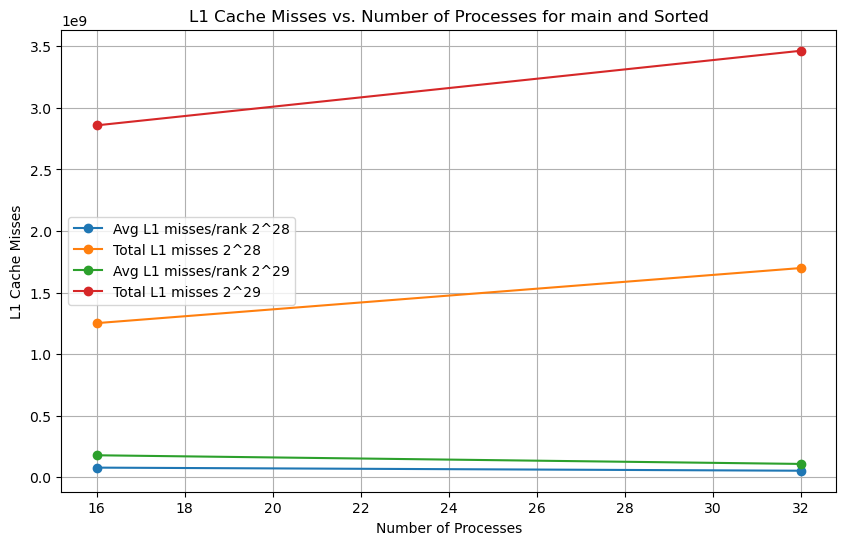

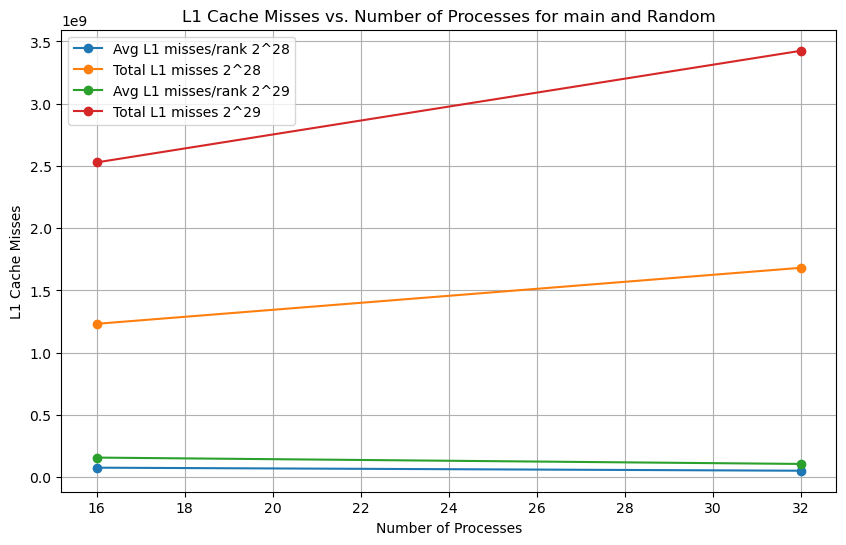

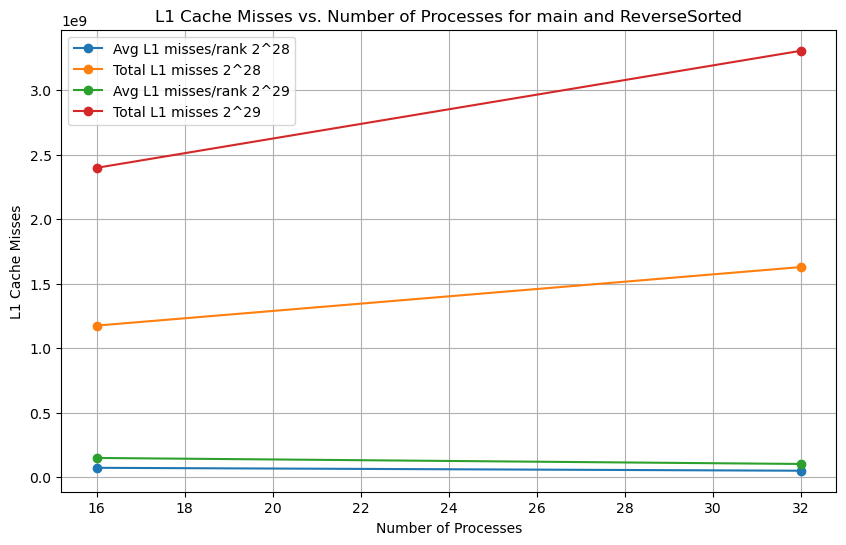

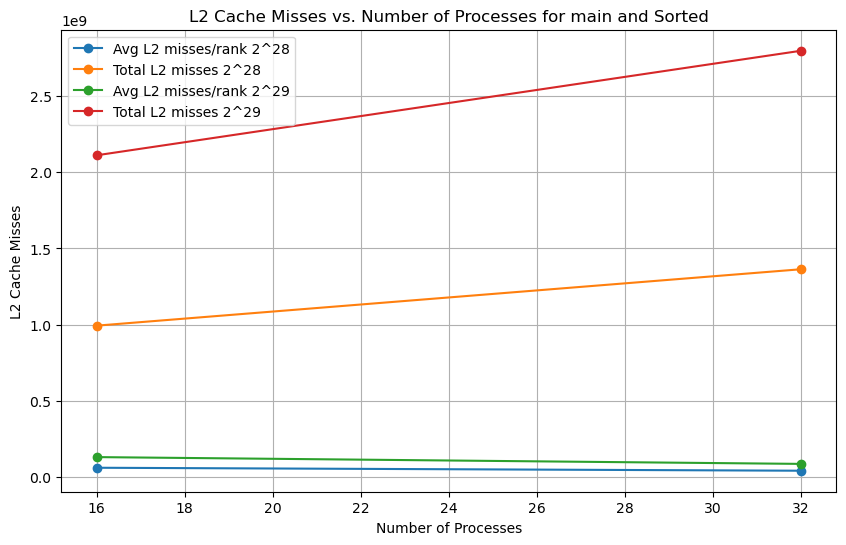

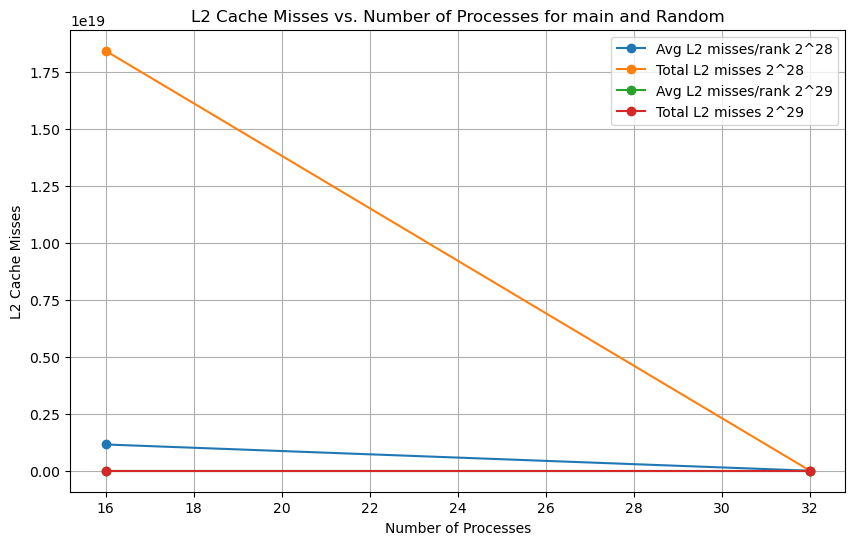

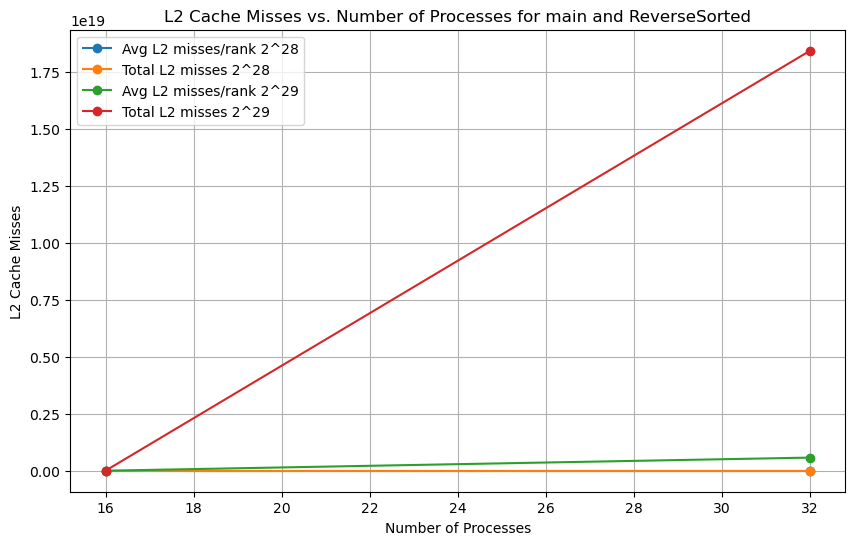

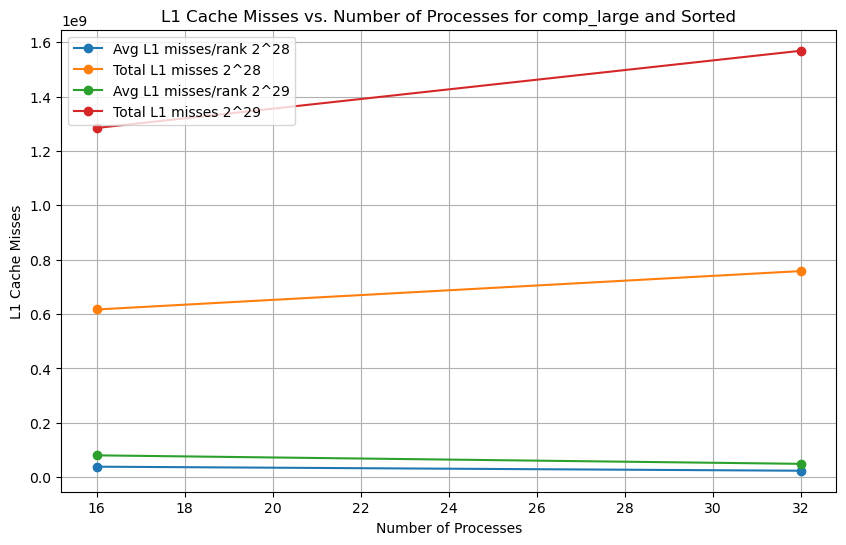

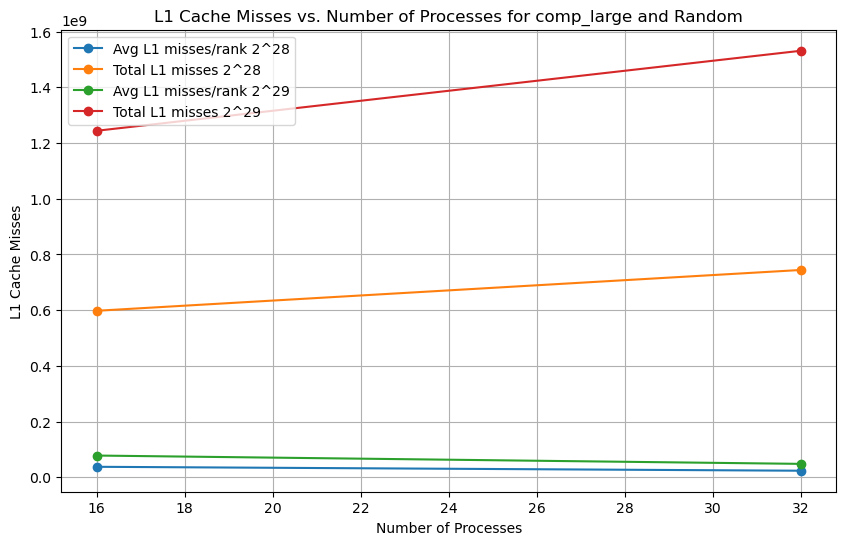

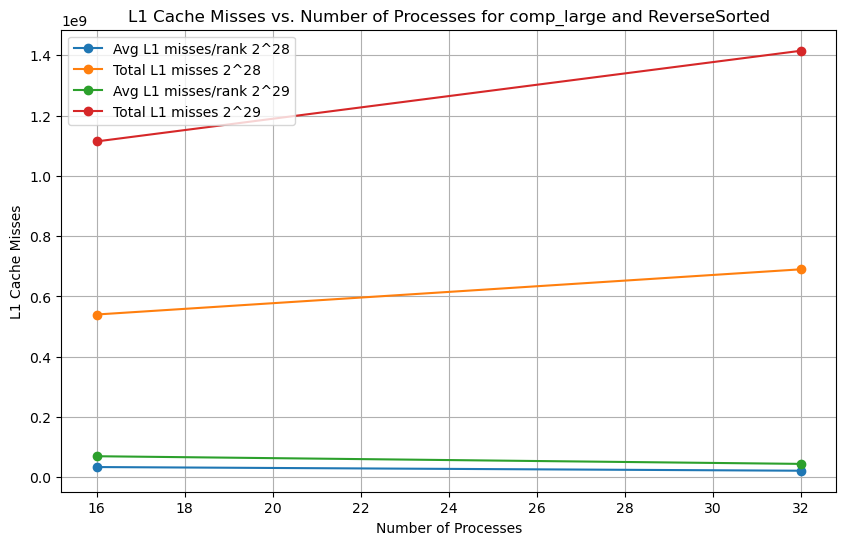

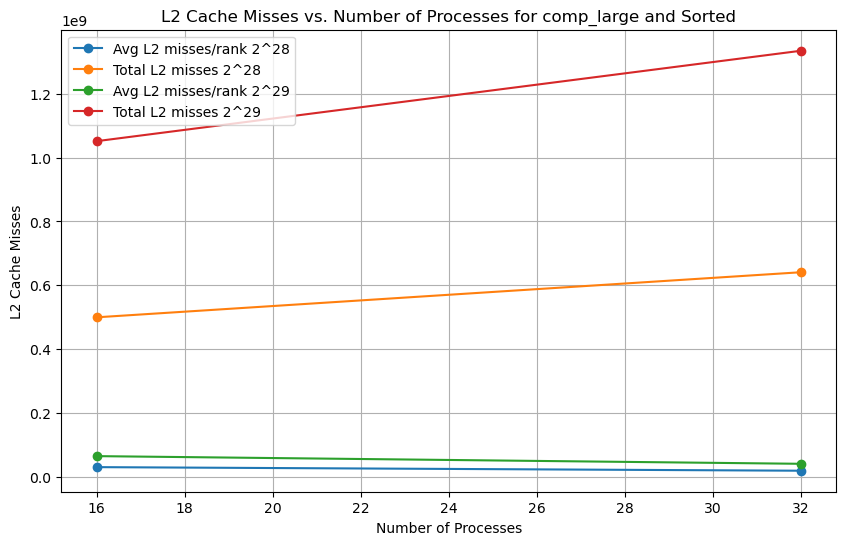

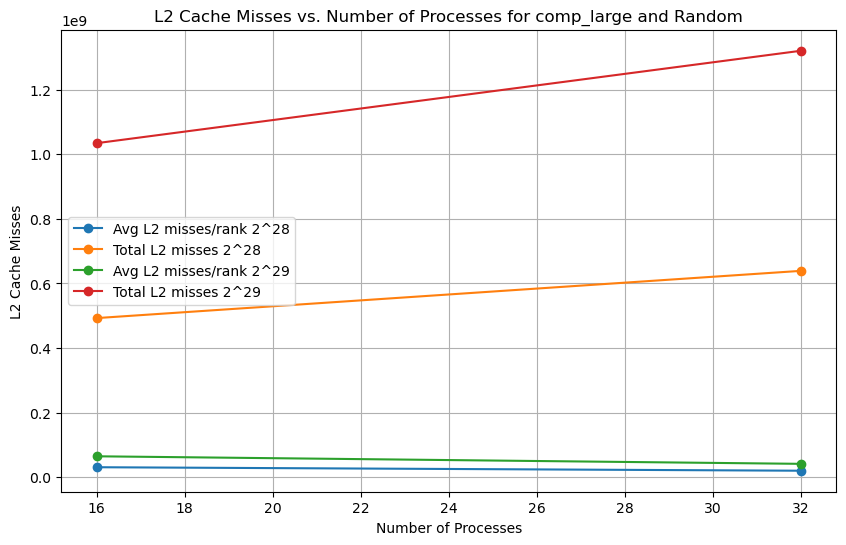

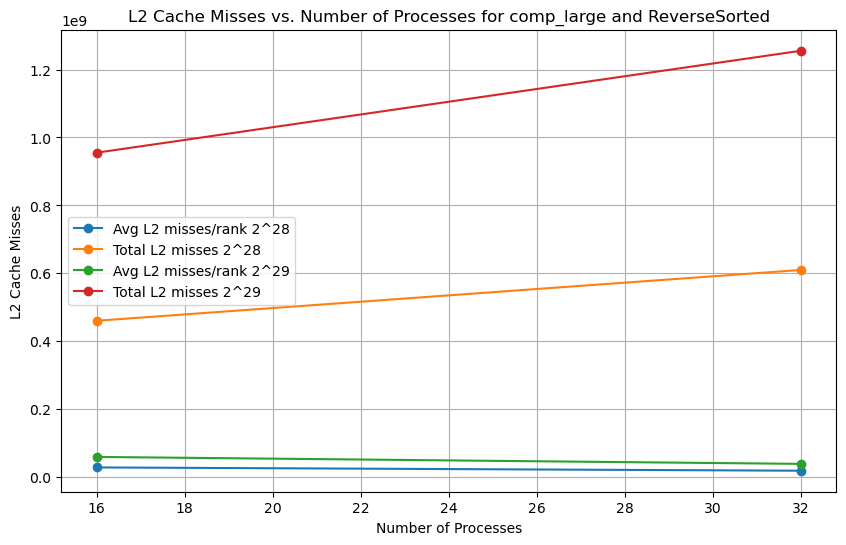

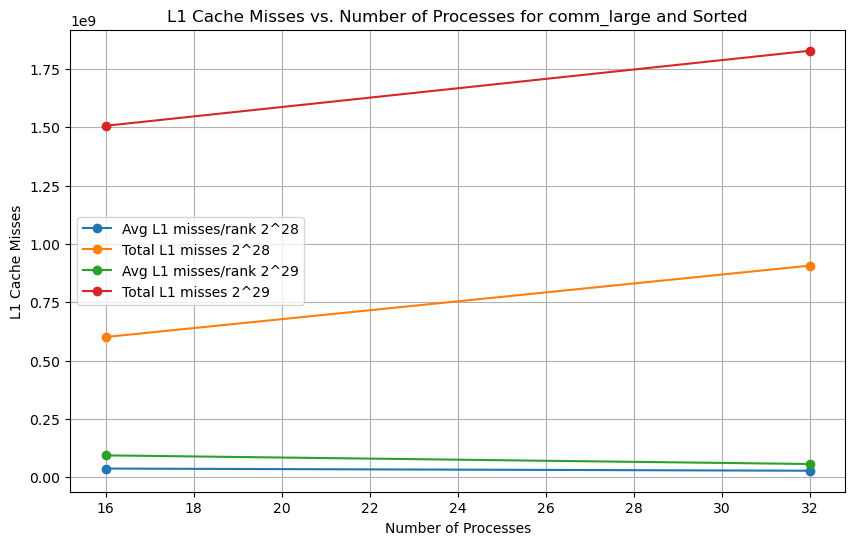

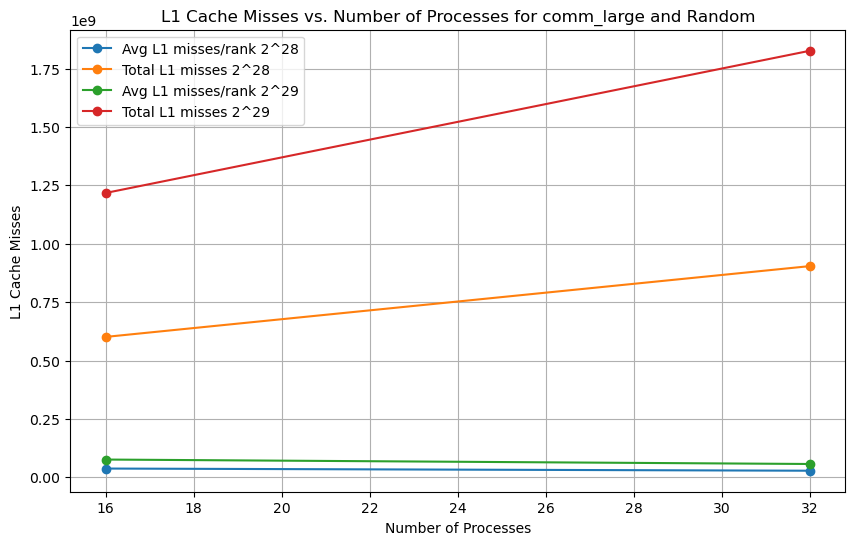

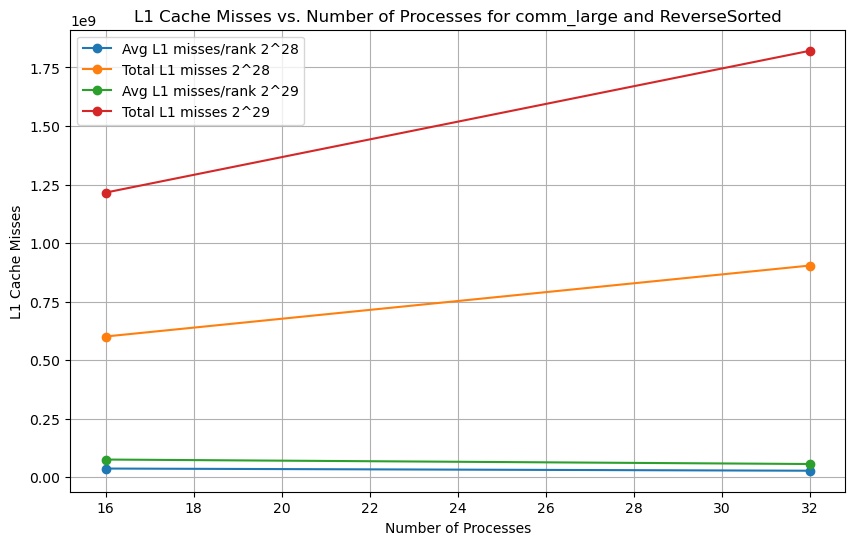

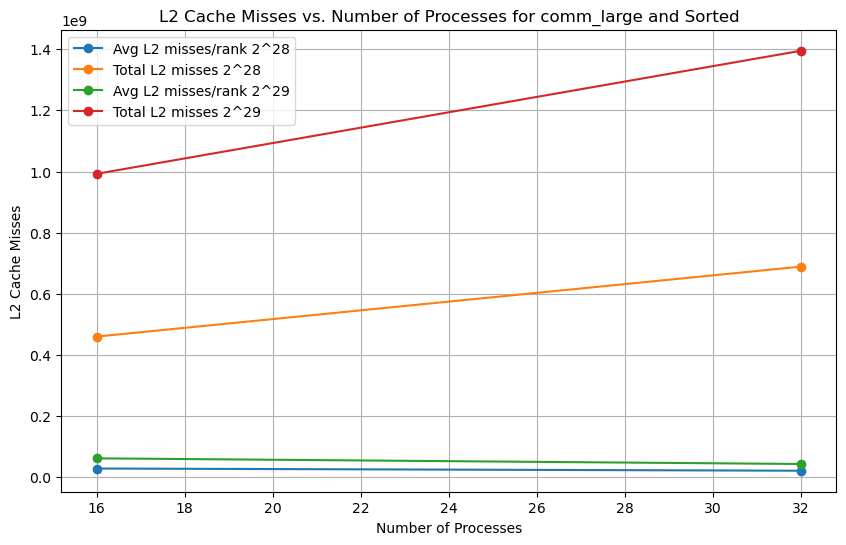

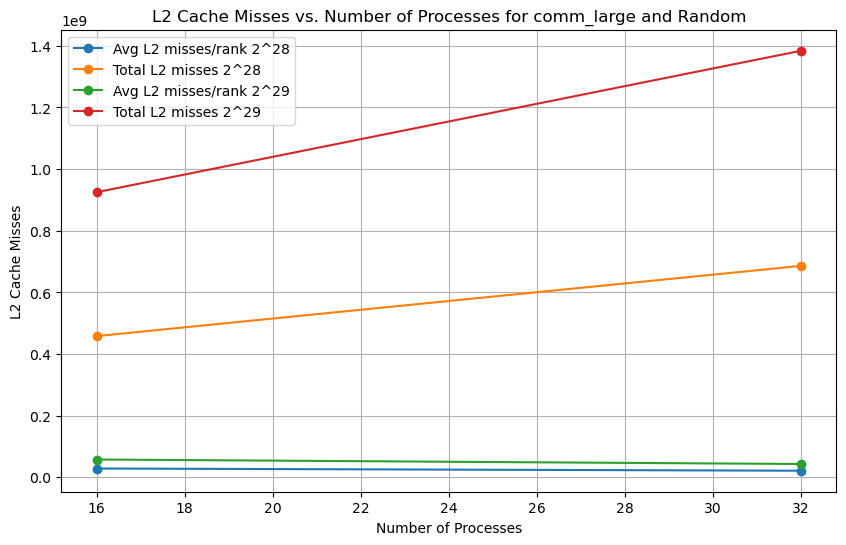

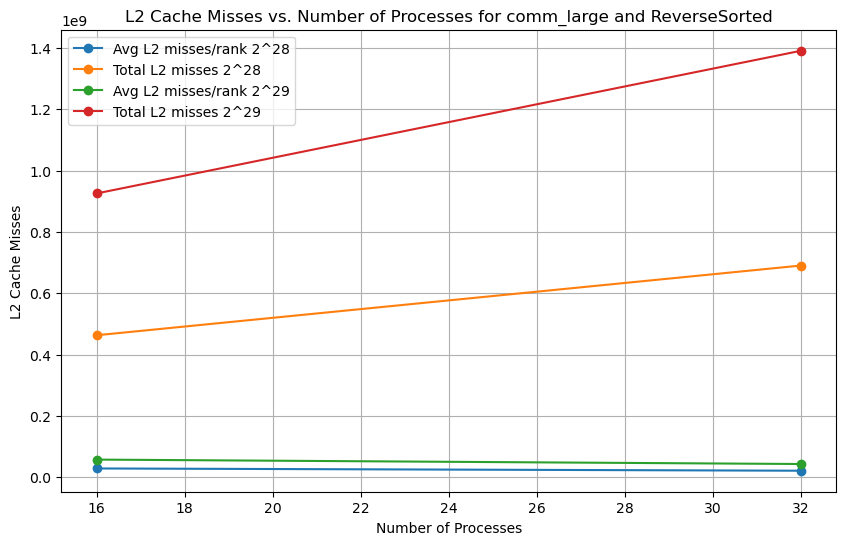

In [10]:
for name in ["main", "comp_large", "comm_large"]:
    for level in ["L1", "L2"]:
        for input_type in ["Sorted", "Random", "ReverseSorted"]:
            plot_misses(df, input_type, name, level)